<a href="https://colab.research.google.com/github/Ljmarcer/Smote_Variants/blob/main/State_of_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In order to localize this project, we first need to precisely do an EDA on the models already worked on this dataset obtained from kaggle,

In [1]:
import pandas as pd 
import numpy  as np
import sys, os 
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import ipykernel

In [2]:
!pip install odfpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 717 kB 5.3 MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=264f54cf83a80b18c3bf7a953304f293844a4784ab67fb6c43d6e4bf594d2775
  Stored in directory: /root/.cache/pip/wheels/e2/f4/5d/a68c656235d33455a1d0f78e877acddfa006907a6d52d7e6ee
Successfully built odfpy


# Loading and Cleaning

In [30]:

url ='https://drive.google.com/file/d/1sCMSHux4jQ2rZnn0hgBVGM_tgGa4XsUd/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#df = pd.read_csv(path)
url2 = 'https://drive.google.com/file/d/1nY9Y3XJsUJI3MbQtJBkEgNuX9H_dtV_g/view?usp=sharing'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df_1 = pd.read_csv(path2)
print(path2)
df= pd.read_excel(path, engine="odf")
full_df = df.copy()
df = df.dropna(subset=['Name'], how='all')
df.info()



https://drive.google.com/uc?export=download&id=1nY9Y3XJsUJI3MbQtJBkEgNuX9H_dtV_g
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               30 non-null     int64 
 1   Name             30 non-null     object
 2   Author           30 non-null     object
 3   TypeAlgorithm    30 non-null     object
 4   AlgUsed          30 non-null     object
 5   MetricUsed       30 non-null     object
 6   BestModel        30 non-null     object
 7   BestModelValues  30 non-null     object
 8   MetricGoal       30 non-null     object
 9   SmoteApplied     30 non-null     bool  
 10  SmoteVariant     4 non-null      object
 11  Comment          6 non-null      object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.8+ KB


In [31]:
df

,ID,Name,Author,TypeAlgorithm,AlgUsed,MetricUsed,BestModel,BestModelValues,MetricGoal,SmoteApplied,SmoteVariant,Comment
0,1,Churn Model (Accuracy: 88.2% Recall: 88.7%),CATHERINE SO,Supervised,"Logistic Reg,SVC,Random Forest,XGB","Accuracy,Recall,Precision,F1",XGB,"0.627878,0.968886,0.576027,0.722506",Recall,True,SMOTE,He takes the Recall Score but shows the best F...
1,2,Customer Churn Modelling | XGBoost | 87%,SUYASH LAKHANI,Supervised,XGB,Accuracy,XGB,0.866147664,Accuracy,True,SMOTE,NaN
2,3,Churn(ML_all_in_one),ALI DERAKHSHESH,Supervised,"KNN , Gaussian Naive Bayes ,Decision tree, SVC...","Accuracy,Precision",XGB,"0.8570,0.886377",Accuracy,True,SMOTE,NaN
3,4,Java's Dilemma,DUTTASD28,Supervised,"Logistic Reg ,Decision Tree, Random Forest , ...",F1,XGB,0.809907834,F1,False,NaN,NaN
4,5,Churn Modelling,guptaabhi7,Supervised,"Logistic Reg,SVC,KNN , Gaussian Naive Bayes, G...",Accuracy,Gradient Boosting,0.867272727,Accuracy,False,NaN,NaN
5,6,Customer Churn Modeling: EDA + FE + Model ??,GALAXY GEORG,Supervised,"KNN, Gradient Boosting,Random Forest,ANN",Accuracy,Random Forest,"0.6750,0.8587,0.8630,0.8637",Accuracy,False,NaN,This is the best variable explanation i've see...
6,7,??Neural Networks OPT w/ Keras Tuner and Optun...,LUDOVICO CUOGHI,Supervised,ANN,"Accuracy,Recall,Precision,F1,ROC",ANN,"0.80,0.51,0.75,0.61,0.78",Accuracy,True,SMOTE,NaN
7,8,Customer Churn Prediction Using ANN,NITESH YADAV,Supervised,ANN,Accuracy,ANN,0.86559999,Accuracy,False,NaN,NaN
8,9,Churn-Classification,SOUHARDYA GANGULY,Supervised,ANN,"Accuracy,Recall,Precision,F1",ANN,"0.86,0.75, 0.76,0.76",Accuracy,False,NaN,NaN
9,10,Churn: ANN + Data Viz. + Tuning (86.3% Accuracy),SIDDHESH SAWANT,Supervised,ANN,Accuracy,ANN,0.8630,Accuracy,False,NaN,NaN


In [32]:
df = df.drop(columns = ['Name','Author','Comment'])

With a delimiter que can split the string we have passed the dataframe into a list, for this we are going to convert into a list all columns with this pattern

In [33]:
lists = ['AlgUsed', 'MetricUsed', 'BestModelValues' ]
lists_names = ['Alg_', 'MetricValue_', 'BestModelValue_']

In [34]:
import ast

In [35]:
i=0
appended_data = []
for column in lists:
  df[column] = df[column].apply(lambda s:list(s.replace("'",'').replace(" ",'').replace(";","").split(',')))
  appended_data.append((pd.DataFrame(df[column].values.tolist()).add_prefix(lists_names[i])))
  i+=1

df.head()


,ID,TypeAlgorithm,AlgUsed,MetricUsed,BestModel,BestModelValues,MetricGoal,SmoteApplied,SmoteVariant
0,1,Supervised,"[LogisticReg, SVC, RandomForest, XGB]","[Accuracy, Recall, Precision, F1]",XGB,"[0.627878, 0.968886, 0.576027, 0.722506]",Recall,True,SMOTE
1,2,Supervised,[XGB],[Accuracy],XGB,[0.866147664],Accuracy,True,SMOTE
2,3,Supervised,"[KNN, GaussianNaiveBayes, Decisiontree, SVC, R...","[Accuracy, Precision]",XGB,"[0.8570, 0.886377]",Accuracy,True,SMOTE
3,4,Supervised,"[LogisticReg, DecisionTree, RandomForest, Extr...",[F1],XGB,[0.809907834],F1,False,NaN
4,5,Supervised,"[LogisticReg, SVC, KNN, GaussianNaiveBayes, Gr...",[Accuracy],Gradient Boosting,[0.867272727],Accuracy,False,NaN


In [36]:
df2  = pd.concat(appended_data , axis=1)
df_final = pd.concat([df,df2] , axis=1)

In [37]:
df_final = df_final.replace("ANN ","ANN").replace("GaussianNaiveBaye","GaussianNaiveBayes")

In [38]:
df_final.BestModel.value_counts()

ANN                  13
XGB                   7
Random Forest         6
Gradient Boosting     1
CatBoost              1
Decision Tree         1
GBM                   1
Name: BestModel, dtype: int64

In [39]:
df_final.BestModel.unique()

array(['XGB', 'Gradient Boosting', 'Random Forest', 'ANN', 'CatBoost',
       'Decision Tree', 'GBM'], dtype=object)

# Viewing Results

In [40]:
from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)




Setting Fig Size

In [41]:
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 14,9
rcParams['axes.titlesize'] = 4
plt.style.use('ggplot')

## Accuracy

In [42]:
df_acc = df_final[df_final['MetricGoal'] == 'Accuracy']


In [43]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 29
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                27 non-null     int64 
 1   TypeAlgorithm     27 non-null     object
 2   AlgUsed           27 non-null     object
 3   MetricUsed        27 non-null     object
 4   BestModel         27 non-null     object
 5   BestModelValues   27 non-null     object
 6   MetricGoal        27 non-null     object
 7   SmoteApplied      27 non-null     bool  
 8   SmoteVariant      3 non-null      object
 9   Alg_0             27 non-null     object
 10  Alg_1             13 non-null     object
 11  Alg_2             9 non-null      object
 12  Alg_3             6 non-null      object
 13  Alg_4             4 non-null      object
 14  Alg_5             3 non-null      object
 15  Alg_6             2 non-null      object
 16  Alg_7             1 non-null      object
 17  Alg_8             

In [44]:
list2 = ['MetricValue', 'BestModelValue']

In [45]:
for column in list2:
  for i in range(4):
   df_acc[f'BestModelValue_{i}']= df_acc[f'BestModelValue_{i}'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Accuracy plot
> Accuracy of each notebook.

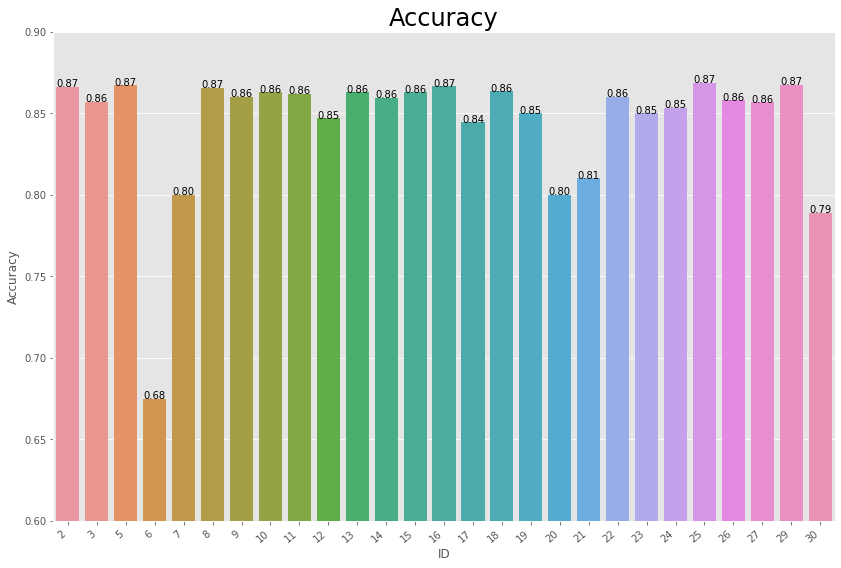

In [46]:
ax = sns.barplot(x = df_acc.ID, y = df_acc.BestModelValue_0, orient = 'v')
ax.set(ylabel='Accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Accuracy',fontsize=24)
ax.set_ylim([0.60, 0.90])
show_values_on_bars(ax)
plt.savefig('accu.png', bbox_inches='tight')

### Distribution of Accuracy
> Distribution of a certain algorithm to classify the data, seen by accuracy score.

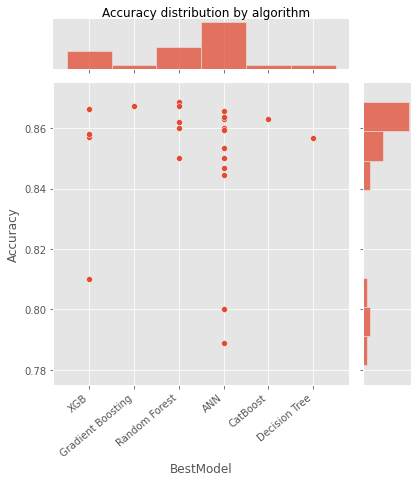

In [47]:
g= sns.jointplot(data=df_acc, x="BestModel", y="BestModelValue_0")
ax = g.ax_joint
ax.set(ylabel='Accuracy')

g.fig.suptitle("Accuracy distribution by algorithm")
#x.collections[0].set_alpha(0)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
#ax.set_title('Accuracy distribution by algorithm',fontsize=24)
ax.set_ylim(0.775,0.875)
ax.set_xticklabels(pd.unique(df_acc["BestModel"]),  rotation=40, ha="right")
plt.savefig('distrubted.png', bbox_inches='tight')

In [48]:
 df_acc.BestModelValue_0.describe()

count    27.000000
mean      0.843917
std       0.040667
min       0.675000
25%       0.848400
50%       0.859500
75%       0.863250
max       0.868600
Name: BestModelValue_0, dtype: float64

## Algorithms used
> Any Kind of classifer or ANN used to classify the labels and make the predictions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


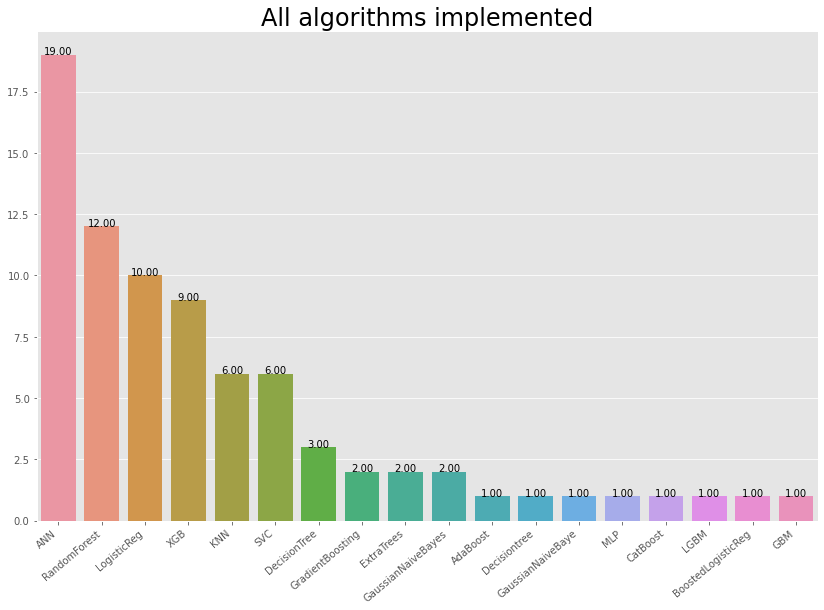

In [49]:
from itertools import chain

test = pd.Series(list(chain.from_iterable(df['AlgUsed']))).value_counts()
ax = sns.barplot(test.index, test.values)
#plt.tight_layout()
ax.set_title('All algorithms implemented',fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
show_values_on_bars(ax)
plt.savefig('allags.png', bbox_inches='tight')

## Best Model Algorithm
> Selected Algorithms as the best, by the authors choice.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


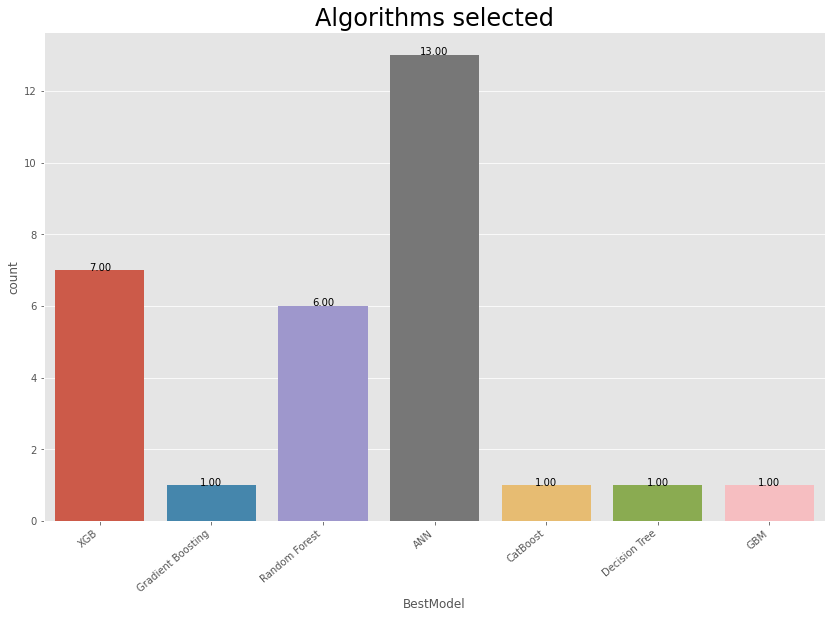

In [50]:
ax = sns.countplot(df_final['BestModel'])
show_values_on_bars(ax)
ax.set_title('Algorithms selected',fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('bestmodel.png', bbox_inches='tight')

In [51]:
pd.unique(df_final['BestModel'])

array(['XGB', 'Gradient Boosting', 'Random Forest', 'ANN', 'CatBoost',
       'Decision Tree', 'GBM'], dtype=object)

## Selection Rate Model
> In order to get a good understanding of each notebook internal competition, we are reviewing algorithms selected as the best when there was more than one algorithm. This is the selection rate.

In [52]:
df_final['BestModel'] = df_final['BestModel'].str.strip(' ')
df_final['BestModel'] = df_final['BestModel'].str.replace(' ', '')

In [53]:
mylist = []
algorithms = pd.unique(test.index)
df_final['nums'] =  df_final['AlgUsed'].str.len()
df_algs = df_final[df_final['nums'] > 1]
df_algs
mylist = [['alg','percentage']]
for alg in algorithms:
  if any(df_algs['BestModel'] == alg):
    mylist.append([alg, (df_algs['BestModel'].value_counts()[alg]) / (pd.Series(list(chain.from_iterable(df_algs['AlgUsed']))).value_counts()[alg])*100  ])
  else:
    pass

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


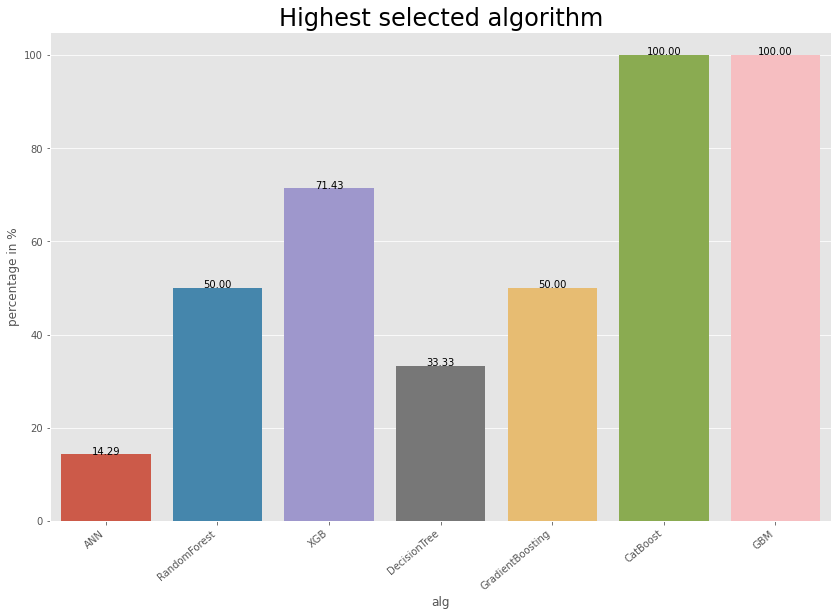

In [54]:
df_percentage = pd.DataFrame(mylist[1:], columns= mylist[0])
ax = sns.barplot(df_percentage['alg'], df_percentage['percentage'])
ax.set(ylabel='percentage in %')
ax.set_title('Highest selected algorithm',fontsize=24)
show_values_on_bars(ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('highest.png', bbox_inches='tight')

## Metrics used

>Metrics selected or present in each notebook.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


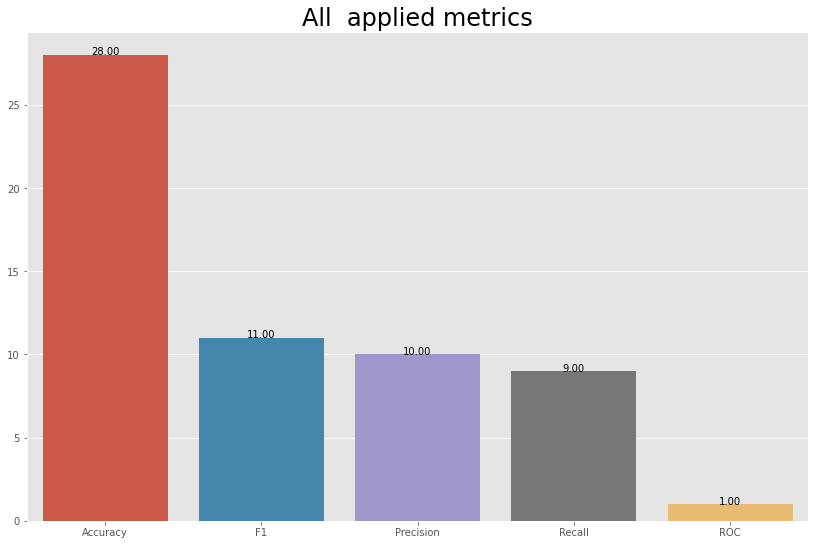

In [55]:

test2 = pd.Series(list(chain.from_iterable(df_final['MetricUsed']))).value_counts()
test2
ax = sns.barplot(test2.index, test2.values)
ax.set_title('All  applied metrics',fontsize=24)
show_values_on_bars(ax)

plt.savefig('metrics.png', bbox_inches='tight')

## Metric Goal
> As best model , by author's comments , the metric that qualifies the notebooks result.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


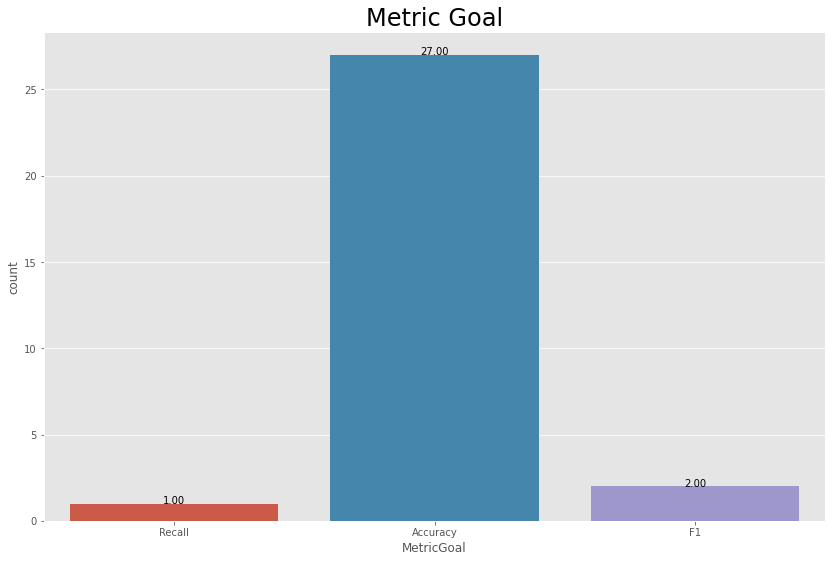

In [56]:
ax = sns.countplot(df_final['MetricGoal'])
ax.set_title('Metric Goal',fontsize=24)

show_values_on_bars(ax)
plt.savefig('metric_goal.png', bbox_inches='tight')

## Is Smote Used
> How many notebooks used Smote oversampler

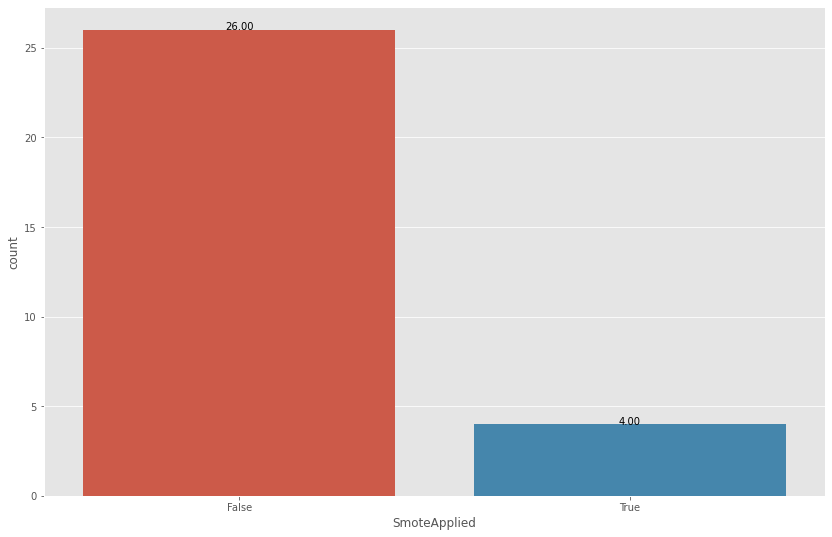

In [57]:
import seaborn as sns
ax = sns.countplot(x="SmoteApplied", data=df)
#ax.set_tile('Smote implemented',fontsize=42)
show_values_on_bars(ax)
plt.savefig('Smoteimp.png', bbox_inches='tight')

# Findings:

- Smote is hardly an option in the entire competition, few people actually use any kind of oversampler, it may be a lack of knowledge or that they did not see the convenience of it, but only 4/30 have used Smote. 

- Accuracy is mainly the only option for all the scientist out there, achieving a mean of 0.8439, a value we seek to pass.

- Neuronal Networks are the main approach in order to start solving the riddle, its been applied 19/30. Nevertheless, it doesnt have that much of a selection rate as XGB. Even More, its rate is really low when competing with others algorithms, 14.29% rate. XGB gets a 71.43% in this matter.

- Boosting Algorithms (XGB) are the most selected algorithm with a 71.43% of selection/participation.

- Logistic Reg is also one of the most used algorithms, problably because of its simplicity, because we can clearly see it hasnt been selected a single time as the best model.

- CatBoost and GBM have a 100% selection rate,but they only have been selected in the competition once.

#  Competition with our results
> Results achieved in our [classifier notebook](https://github.com/Ljmarcer/Smote_Variants/blob/main/Smote_Variants_Classifier.ipynb) compared to these notebooks, we are going to take into account all the project that contains at least 2 metrics that we have.  

In [58]:
df_comp = df_final[df_final.isin(["Recall"]).any(axis=1)]
df_comp['ID'] = df['ID'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
df_comp = df_comp[1:]

In [60]:
df_comp['team'] = 'rivals'

In [61]:
df_comp.rename(columns = {'BestModelValue_0':'accuracy','BestModelValue_1': 'recall', 'BestModelValue_2':'precision', 'BestModelValue_3':'f1-score'}, inplace= True)

In [62]:
df_them = df_comp[['precision','recall','f1-score','accuracy','ID','team']]

In [63]:
df_1 = df_1.replace("LGNM","LGBM")
df_1['ID'] = df_1['ovr'] + "_" + df_1['alg']
df_1

,Unnamed: 0,precision,recall,f1-score,support,ovr,alg,acc,ID
0,7,0.746623,0.798957,0.765654,1000,Smote,XGB,0.830,Smote_XGB
1,8,0.738648,0.787943,0.756679,1000,Lee,XGB,0.824,Lee_XGB
2,14,0.717245,0.783080,0.735832,1000,Lee,LGBM,0.799,Lee_LGBM
3,13,0.713150,0.778754,0.731264,1000,Smote,LGBM,0.795,Smote_LGBM
4,16,0.772933,0.738503,0.753216,1000,Supervised-Smote,LGBM,0.849,Supervised-Smote_LGBM


In [64]:
df_us = df_1[['precision','recall','acc','f1-score','ID']]

In [65]:
df_us = df_us.rename(columns = {'acc':'accuracy'})

In [66]:
df_us['team'] = 'us'

In [67]:
df_united = pd.concat([df_us,df_them], axis=0)

In [68]:
df_united.head()

,precision,recall,accuracy,f1-score,ID,team
0,0.746623,0.798957,0.83,0.765654,Smote_XGB,us
1,0.738648,0.787943,0.824,0.756679,Lee_XGB,us
2,0.717245,0.78308,0.799,0.735832,Lee_LGBM,us
3,0.71315,0.778754,0.795,0.731264,Smote_LGBM,us
4,0.772933,0.738503,0.849,0.753216,Supervised-Smote_LGBM,us


In [69]:
for column in ['precision','recall','accuracy','f1-score']:
  df_united[column] = df_united[column].apply(lambda x: float(x))

In [70]:
df_m = df_united.melt(id_vars=["ID","team"], 
        var_name="Metric", 
        value_name="Value").reset_index(drop=True)

## Visualizing The results

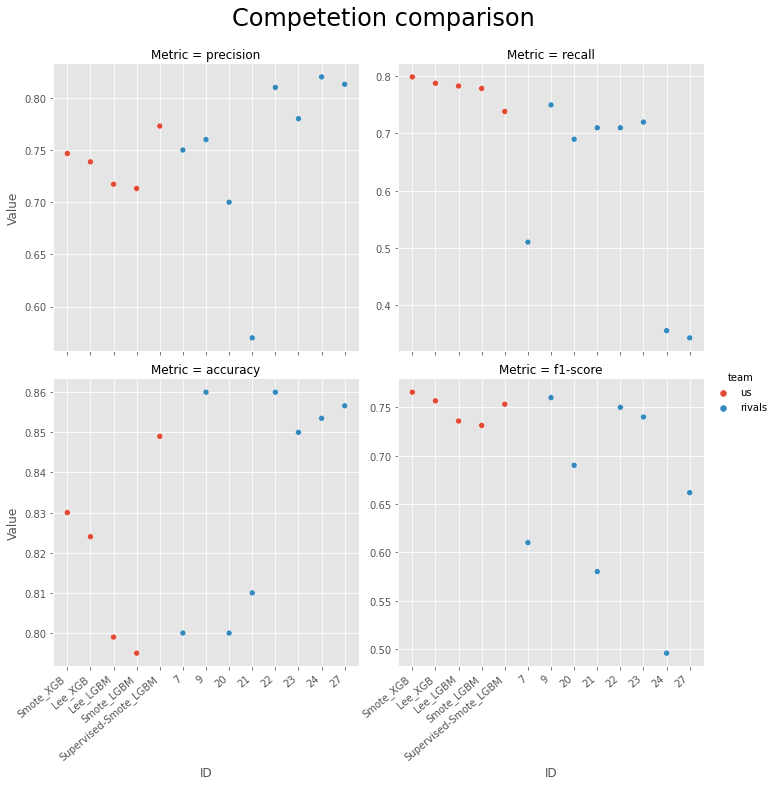

In [71]:
g = sns.relplot(x="ID", y="Value", hue="team",facet_kws={'sharey': False, 'sharex': True},
            col="Metric", col_wrap=2, data=df_m);
            #move overall title up
g.fig.subplots_adjust(top=.9)

#add overall title
g.fig.suptitle('Competetion comparison',fontsize=24 )
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=40 ,ha="right",   )
    show_values_on_bars(axes)
    #axes.invert_yaxis()
g.savefig('Comparison.png', bbox_inches='tight')

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly import express as px
fig = px.scatter(df_m, x="Metric", y="Value" , color = 'team' , symbol='Metric')
fig.update_traces(marker=dict(size=16,
                              line=dict(width=3,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

## Summary
> Few comments on our results compared with the others

-Our recall rate is really good compared with others, this is our guide metric since the problem we want to solve requires as most as possible positives instances detections. 

-Our F1 stands high but our accuracy and precision fall, this makes sense since we have a different target here.

# SMOTE 

Link: https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_illustration_generation_sample.html

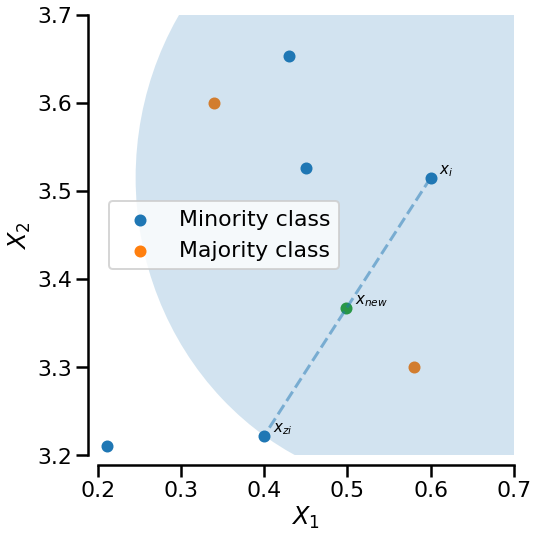

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

rng = np.random.RandomState(18)

f, ax = plt.subplots(figsize=(8, 8))

 #generate some data points
y = np.array([3.65284, 3.52623, 3.51468, 3.22199, 3.21])
z = np.array([0.43, 0.45, 0.6, 0.4, 0.211])
y_2 = np.array([3.3, 3.6])
z_2 = np.array([0.58, 0.34])

# plot the majority and minority samples
ax.scatter(z, y, label="Minority class", s=100)
ax.scatter(z_2, y_2, label="Majority class", s=100)

idx = rng.randint(len(y), size=2)
annotation = [r"$x_i$", r"$x_{zi}$"]

for a, i in zip(annotation, idx):
    ax.annotate(a, (z[i], y[i]), xytext=tuple([z[i] + 0.01, y[i] + 0.005]), fontsize=15)
newpoint = idx[0] - 0.02
# draw the circle in which the new sample will generated
radius = np.sqrt((z[idx[0]] - z[idx[1]]) ** 2 + (y[idx[0]] - y[idx[1]]) ** 2)
circle = plt.Circle((z[idx[0]], y[idx[0]]), radius=radius, alpha=0.2)
ax.add_artist(circle)    # Make the circle 

# plot the line on which the sample will be generated
ax.plot(z[idx], y[idx], "--", alpha=0.5)

#create and plot the new sample
step = rng.uniform()
y_gen = y[idx[0]] + step * (y[idx[1]] - y[idx[0]]) # creates the point
z_gen = z[idx[0]] + step * (z[idx[1]] - z[idx[0]])

ax.scatter(z_gen, y_gen, s=100)
ax.annotate(
    r"$x_{new}$",
    (z_gen, y_gen),
    xytext=tuple([z_gen + 0.01, y_gen + 0.005]),
    fontsize=15,
)

# # make the plot nicer with legend and label
sns.despine(ax=ax, offset=10)
ax.set_xlim([0.2, 0.7])
ax.set_ylim([3.2, 3.7])
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.legend(loc=6)
plt.tight_layout()
plt.savefig('Smote_point.png', bbox_inches='tight')
plt.show()